In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Motivation

The dataset employed in this project is the 'Air Traffic Passenger Statistics' of the San Francisco Airport. The dataset holds information about the Monthly Passenger Traffic Statistics. In order words it records all flights departing, arriving, or stopping over in San Francisco over a span of 23 years. Each flight is logged once per month, and the passenger count is calculated by aggregating all passengers on that flight during the respective month.
We opted for this specific dataset due to its expansive scope, encompassing 15 attributes and spanning 23 years, which offers ample opportunities for diverse studies related to San Francisco Airport and its air traffic. Moverover we personally think that the topic could be wordwide interesting given that airports serve as critical infrastructure facilitating thousands of flights daily, orchestrated through meticulous scheduling.

The final aim of this project is to show the evolution of the San Francisco Airport over 23 years of history, highlighting the impact of significant historical events such as the COVID-19 pandemic and the September 11 attacks on air traffic patterns.

To achieve this objective, and with regard to the end user's experience, the aim is to provide  a user-friendly interface that allows users to explore and understand the data easily. Additionally, the goal is to present insights clearly and effectively through well-designed visualizations and explanatory text.

In [74]:
df = pd.read_csv('Air_Traffic_Passenger_Statistics_20240408.csv')
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024/03/20 01:00:30 PM,2024/04/03 04:10:33 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024/03/20 01:00:30 PM,2024/04/03 04:10:33 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024/03/20 01:00:30 PM,2024/04/03 04:10:33 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024/03/20 01:00:30 PM,2024/04/03 04:10:33 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024/03/20 01:00:30 PM,2024/04/03 04:10:33 PM


# Basic stats

Let's first check if there are any missing values:

In [75]:
# Delete duplicates
df = df.drop_duplicates()

# Find rows with one or more empty columns
empty_rows = df[df.isnull().any(axis=1)]

# Find columns with empty values
empty_columns = []
for index, row in empty_rows.iterrows():
    empty_columns.extend([col for col in df.columns if pd.isnull(row[col])])

unique_empty_columns = list(set(empty_columns))
print(unique_empty_columns)

['Operating Airline IATA Code', 'Published Airline IATA Code']


Since the only columns that have empty values are these two, we decided to remove them because the information in them are the same as the ones in "Operating Airline" and "Published Airline" columns.

In [76]:
df.drop(columns=['Published Airline IATA Code', 'Operating Airline IATA Code'], inplace=True)

# Clean unnecessary columns
df.drop(columns=['data_as_of', 'data_loaded_at'], inplace=True)

Ensure that each column has the correct data type:

In [77]:
# Convert columns to datetime format
df['Activity Period Start Date'] = pd.to_datetime(df['Activity Period Start Date'])
df.drop(columns=['Activity Period'], inplace=True)

The dataset itself contains data from July 1999 to January 2024. However, incomplete years, namely 1999 and 2024, have been excluded from the analysis.

In [78]:
# Delete the first and last year of the dataset since they are not complete
df = df[(df['Activity Period Start Date'].dt.year != 1999) & (df['Activity Period Start Date'].dt.year != 2024)]

The dataset contains 34575 entries and 10 features namely respectively 'Activity Period Start Date', 'Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area', 'Passenger Count'

In [79]:
print(f'Dataset number of entries: {df.shape[0]} - Dataset features: {df.columns}')

Dataset number of entries: 34575 - Dataset features: Index(['Activity Period Start Date', 'Operating Airline', 'Published Airline',
       'GEO Summary', 'GEO Region', 'Activity Type Code',
       'Price Category Code', 'Terminal', 'Boarding Area', 'Passenger Count'],
      dtype='object')


The key numerical variable is `passenger count`, representing the total number of passengers associated with a specific flight on a monthly basis. Each flight is recorded as a single entry in the dataframe, rather than creating a new entry for each instance of a flight within a month with identical features. Thus, the 'passenger count' field contains the aggregate number of passengers for each flight per month.

In [80]:
df.head()
print(df[['Passenger Count']].describe())

       Passenger Count
count     34575.000000
mean      27997.878872
std       61931.441368
min           0.000000
25%        4465.000000
50%        8657.000000
75%       19897.500000
max      728304.000000


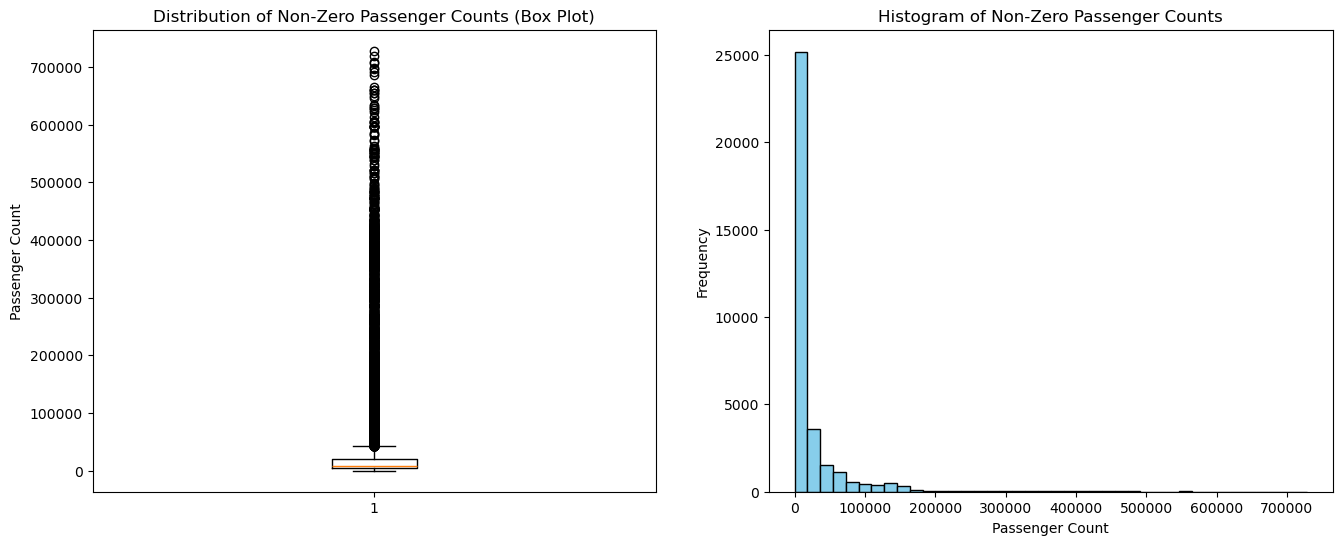

+------+----------------------------+----------------------------------+----------------------------------+-------------+------------+--------------------+---------------------+------------+---------------+-----------------+
| Rank | Activity Period Start Date |        Operating Airline         |        Published Airline         | GEO Summary | GEO Region | Activity Type Code | Price Category Code |  Terminal  | Boarding Area | Passenger Count |
+------+----------------------------+----------------------------------+----------------------------------+-------------+------------+--------------------+---------------------+------------+---------------+-----------------+
|  1   |    2000-06-01 00:00:00     | United Airlines - Pre 07/01/2013 | United Airlines - Pre 07/01/2013 |  Domestic   |     US     |      Enplaned      |        Other        | Terminal 3 |       F       |     728304      |
|  2   |    2000-07-01 00:00:00     | United Airlines - Pre 07/01/2013 | United Airlines - Pre 07/01

In [92]:
non_zero_passenger_count = df[df['Passenger Count'] > 0]['Passenger Count']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
axes[0].boxplot(non_zero_passenger_count)
axes[0].set_title('Distribution of Non-Zero Passenger Counts (Box Plot)')
axes[0].set_ylabel('Passenger Count')

# Histogram
axes[1].hist(non_zero_passenger_count, bins=40, color='#6e80ec', edgecolor='black')
axes[1].set_title('Histogram of Non-Zero Passenger Counts')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Frequency')

plt.show()

non_zero_passenger_df = df[df['Passenger Count'] > 0]
sorted_passenger_df = non_zero_passenger_df.sort_values(by='Passenger Count', ascending=False)

# Select the top 5 rows
top_5_flights = sorted_passenger_df.head(20)
top_5_flights_table = top_5_flights[['Activity Period Start Date', 'Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area', 'Passenger Count']]
top_5_flights_table.index = range(1, len(top_5_flights_table) + 1)  # Reset index to start from 1
top_5_flights_table.index.name = 'Rank'

# Convert DataFrame to a formatted table
table_str = tabulate(top_5_flights_table, headers='keys', tablefmt='pretty')

print(table_str)


The distribution of passenger counts across different periods shows significant variability. There are periods with relatively low passenger counts, while others have exceptionally high counts, suggesting seasonality or specific events influencing travel patterns.

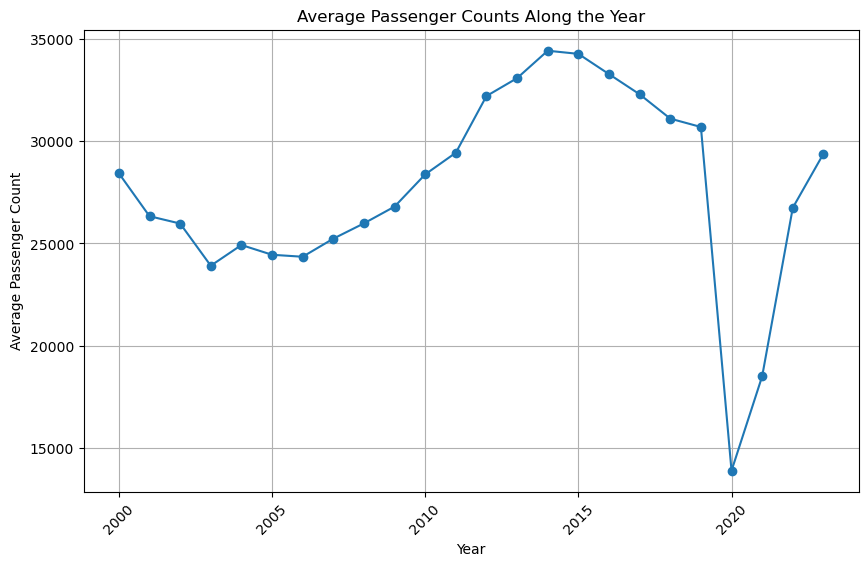

In [82]:

# Extract year from 'Activity Period Start Date'
df['Year'] = df['Activity Period Start Date'].dt.year

# Calculate the average passenger count for each year
df_yearly_avg = df.groupby('Year')['Passenger Count'].mean().reset_index()

# Plot average passenger counts along the year
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_avg['Year'], df_yearly_avg['Passenger Count'], marker='o', linestyle='-', color='#6e80ec')
plt.title('Average Passenger Counts Along the Year')
plt.xlabel('Year')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

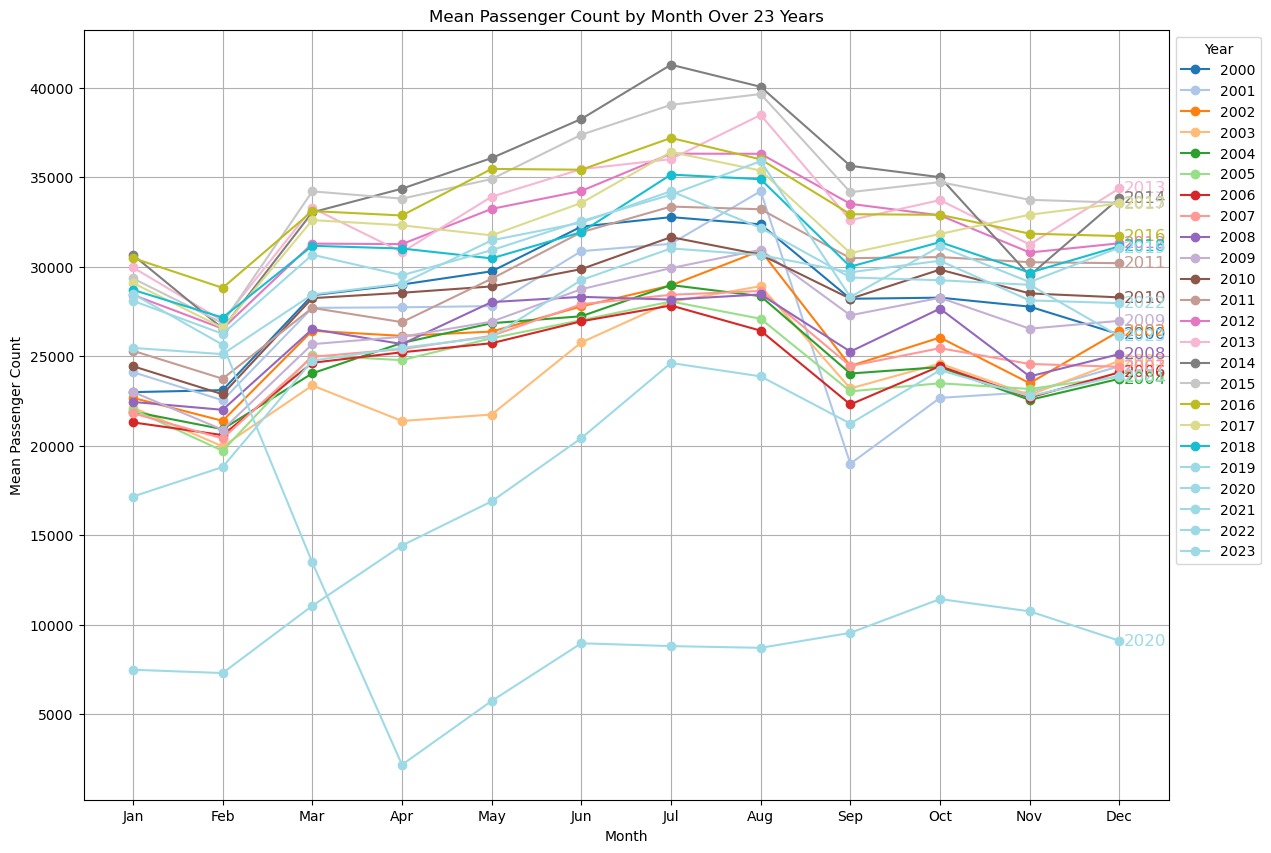

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the airport data

# Convert 'Activity Period Start Date' to datetime if it's not already
df['Activity Period Start Date'] = pd.to_datetime(df['Activity Period Start Date'])

# Extract month and year from 'Activity Period Start Date'
df['Month'] = df['Activity Period Start Date'].dt.month
df['Year'] = df['Activity Period Start Date'].dt.year

# Group data by month and year, and compute mean passenger count
monthly_passenger_count = df.groupby(['Month', 'Year'])['Passenger Count'].mean().unstack()

# Plot the data for each month
plt.figure(figsize=(14, 10))
colors = plt.cm.tab20(range(len(monthly_passenger_count.columns)))
for i, (year, data) in enumerate(monthly_passenger_count.items()):
    plt.plot(data.index, data, marker='o', linestyle='-', color=colors[i], label=str(year))
    # Annotate the last point of each line with the year
    plt.text(data.index[-1]+0.05, data.iloc[-1]-1, str(year), fontsize=12, color=colors[i], va='center')

plt.title('Mean Passenger Count by Month Over 23 Years')
plt.xlabel('Month')
plt.ylabel('Mean Passenger Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()



In our investigation of passenger distribution at San Francisco Airport, we noted instances where certain flights were labeled as "other" in both the 'Terminal' and 'Boarding Area' columns. However, the dataset lacks clarification regarding the meaning of this label, and no additional terminals or boarding areas beyond those mentioned are identified. Due to the limited number of occurrences and the absence of justification for this labeling, these entries have been omitted from our analysis.

In [93]:
# Extract entries where terminal is equal to "other"
other_terminal_entries = df[df['Terminal'] == 'Other']

# Extract entries where boarding area is equal to "other"
other_boarding_area_entries = df[df['Boarding Area'] == 'Other']

# Display the first few rows of each extracted DataFrame
print("Entries with Terminal 'Other':")

print(tabulate(other_terminal_entries, headers='keys', tablefmt='pretty'))


print("\nEntries with Boarding Area 'Other':")
print(tabulate(other_boarding_area_entries, headers='keys', tablefmt='pretty'))


Entries with Terminal 'Other':
+-------+----------------------------+----------------------------------+----------------------------------+---------------+------------+--------------------+---------------------+----------+---------------+-----------------+------+
|       | Activity Period Start Date |        Operating Airline         |        Published Airline         |  GEO Summary  | GEO Region | Activity Type Code | Price Category Code | Terminal | Boarding Area | Passenger Count | Year |
+-------+----------------------------+----------------------------------+----------------------------------+---------------+------------+--------------------+---------------------+----------+---------------+-----------------+------+
| 1552  |    2000-07-01 00:00:00     |           Sports Hawk            |           Sports Hawk            |   Domestic    |     US     |      Deplaned      |        Other        |  Other   |     Other     |       45        | 2000 |
| 1553  |    2000-07-01 00:00:00     

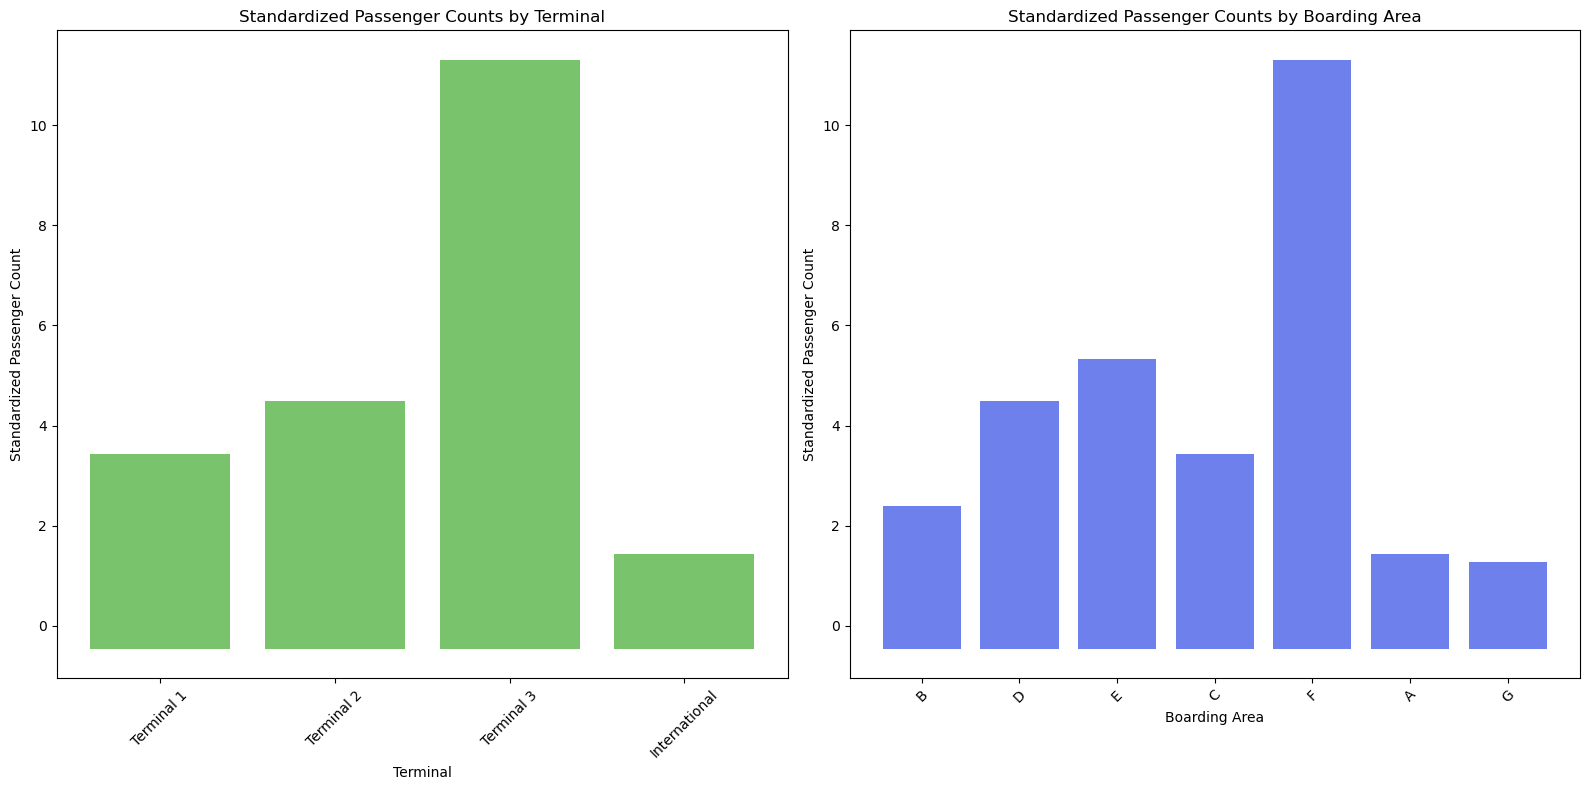

In [100]:
df_terminal = df[df['Terminal'] != 'Other'] 
df_boarding_area = df[df['Boarding Area'] != 'Other'] 

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot standardized passenger counts by terminal
axes[0].bar(df_terminal['Terminal'], (df_terminal['Passenger Count'] - df_terminal['Passenger Count'].mean()) / df_terminal['Passenger Count'].std(), color='#78c36b')
axes[0].set_title('Standardized Passenger Counts by Terminal')
axes[0].set_xlabel('Terminal')
axes[0].set_ylabel('Standardized Passenger Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot standardized passenger counts by boarding area
axes[1].bar(df_boarding_area['Boarding Area'], (df_boarding_area['Passenger Count'] - df_boarding_area['Passenger Count'].mean()) / df_boarding_area['Passenger Count'].std(), color='#6e80ec')
axes[1].set_title('Standardized Passenger Counts by Boarding Area')
axes[1].set_xlabel('Boarding Area')
axes[1].set_ylabel('Standardized Passenger Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


# Data analysis

Recalling that the 'passenger count' field contains the aggregate number of passengers for each flight per month, the initial histogram reveals that the majority of flights have a monthly passenger count of less than 50,000. Nevertheless, approximately ten flights stand out with passenger counts nearing 700,000 per month. These flights are exclusively domestic US routes, with a significant portion originating from the year 2000.

Additionally, over the span of these 23 years, we observe two notable declines in the average passenger count, occurring in 2003 and 2020. When comparing months across different years, a consistent pattern emerges, characterized by a low number of flights in February followed by a gradual increase, reaching its peak during the summer months, particularly in July. Notably, July 2014 recorded the highest passenger count across all years under study.


Analyzing the passenger distribution at San Francisco Airport, it becomes evident that Terminals 2 and 3, primarily designated for domestic flights, exhibit higher utilization compared to those catering to international flights, with their mean passenger counts being notably higher. This trend is also reflected in the bar plot representing boarding areas, reinforcing the observation that areas serving domestic flights experience greater passenger traffic compared to those handling international departures.

# Genre

The genre of data story employed in this project is the *Magazine style*.  
The tools employed where:
<pre>
Visual narrative
├── Visual structuring
│   ├── Establishing Shot / Splash Screen (NOT SURE)
│   └── Consistent Visual Platform
├── highlighting
│   ├── Close-Ups
│   ├── Character Direction
|   ├── Motion
│   └── Zooming
└── transition guidance
    ├── Continuity Editing
    └── Object Continuity
</pre>

<pre>
Narrative structure
├── Ordering
│   ├── Random Access
│   └── User Directed Path
├── Iteractivity
│   ├── Hover Highlighting / Details
│   ├── Filtering / Selection / Search
|   ├── Motion
│   └── Zooming
└── Messaging
    ├── Captions / Headlines
    ├── Annotations
    ├── Accompanying Article
    ├── Comment Repetition
    ├── Introductory Text
    └── Summary / Synthesis
</pre>

# Visualization

The selected visualizations for this project predominantly comprise line plots, bar plots, maps, and heatmaps. To elaborate, line plots are utilized to depict research trends, bar plots to illustrate the distribution of data across specific categories, and maps to showcase geographical distributions, whether on a global scale or within the SFO region. Additionally, heatmaps are employed to visualize the density within the mapped distributions.
Moreover since our dataset spans over 23 years, most of our plots are interactive to facilitate the user in comparing various years more easily.
This decision was made recognizing that airport data exhibits seasonal patterns, making period-over-period comparisons (e.g., January 2010 vs. January 2009) more informative than period-to-period comparisons (e.g., January 2010 vs. February 2010).

# Discussion

Discussion. Think critically about your creation
What went well?,
What is still missing? What could be improved?, Why?


For a more accurate analysis it would have been better to compute the number of passenger per quare meters in the terminal bercause gives a more idea of the density.